In [2]:
from __future__ import print_function
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Forward model: specimen -> Intensity

## Specimen retardance, transmission, degree of polarization, slow axis

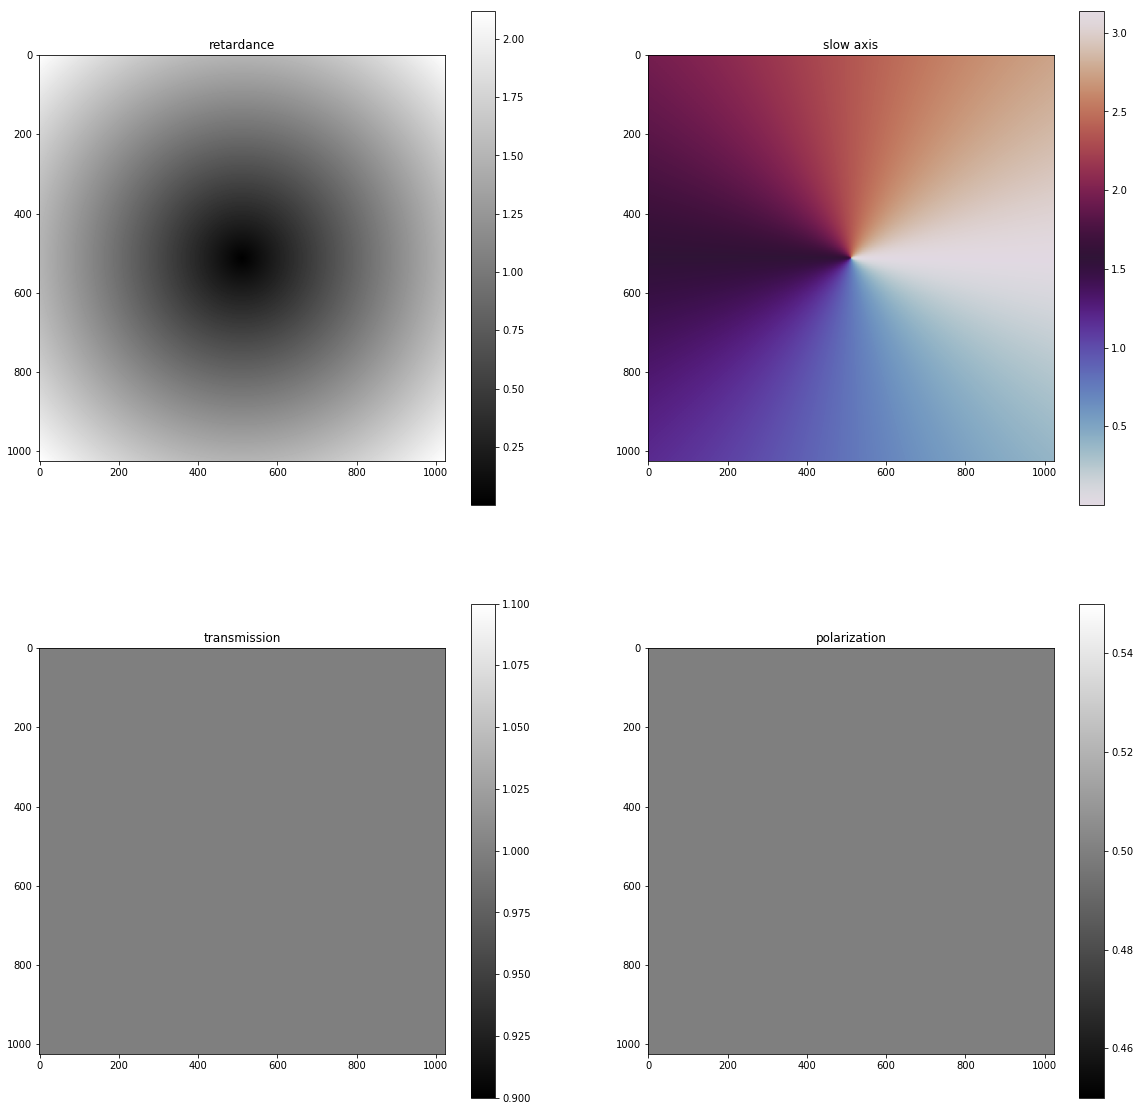

In [94]:
x = np.linspace(-1.5,1.5,1024)
xx, yy = np.meshgrid(x,x)
retardance = np.sqrt(xx**2+yy**2)
slowaxis = 0.5*np.arctan2(yy,xx)%np.pi
transmission=np.ones(xx.shape)
#polarization=0.5*np.sin(np.pi*xx)
polarization=0.5*np.ones(xx.shape)

fig1 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig1.add_subplot(2,2,1) 
im=plt.imshow(retardance,cmap='gray');
plt.title('retardance')
ax1.figure.colorbar(im);

ax2=fig1.add_subplot(2,2,2)
im=plt.imshow(slowaxis,cmap='twilight'); # Need to adapt this look up table to represent orientation.
plt.title('slow axis')
ax2.figure.colorbar(im);

ax3=fig1.add_subplot(2,2,3)
im=plt.imshow(transmission,cmap='gray');
plt.title('transmission')
ax3.figure.colorbar(im);

ax4=fig1.add_subplot(2,2,4)
im=plt.imshow(polarization,cmap='gray');
plt.title('polarization')
ax4.figure.colorbar(im);



## Stokes parameters

In [95]:
s0=transmission
s1=transmission*polarization*np.sin(2*slowaxis)*np.sin(retardance)
s2=-transmission*polarization*np.cos(2*slowaxis)*np.sin(retardance)
s3=transmission*polarization*np.cos(retardance)

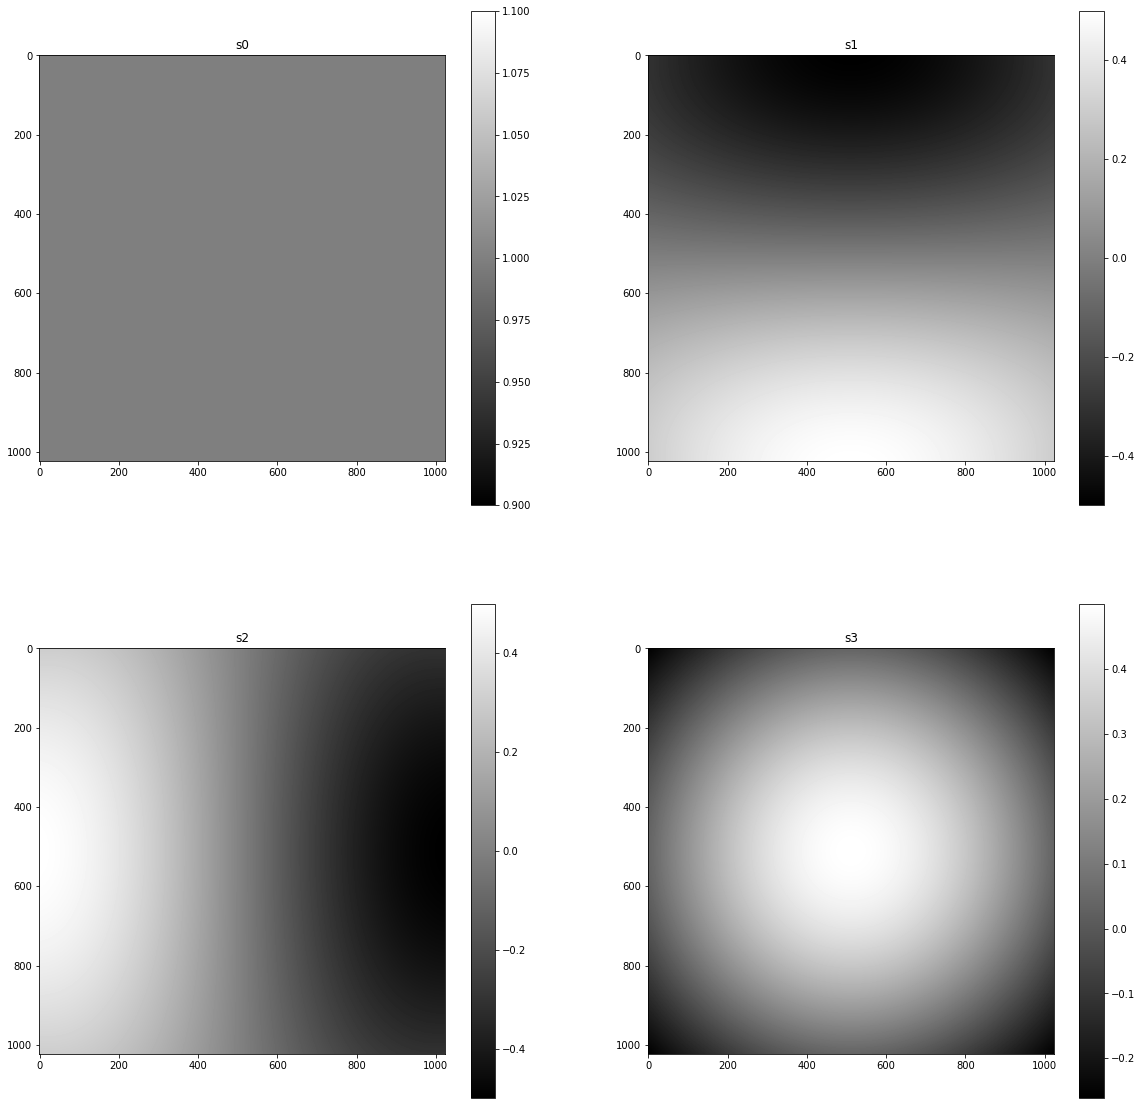

In [96]:
fig2 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig2.add_subplot(2,2,1) 
im=plt.imshow(s0,cmap='gray');
plt.title('s0')
ax1.figure.colorbar(im);

ax2=fig2.add_subplot(2,2,2)
im=plt.imshow(s1,cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('s1')
ax2.figure.colorbar(im);

ax3=fig2.add_subplot(2,2,3)
im=plt.imshow(s2,cmap='gray');
plt.title('s2')
ax3.figure.colorbar(im);

ax4=fig2.add_subplot(2,2,4)
im=plt.imshow(s3,cmap='gray');
plt.title('s3')
ax4.figure.colorbar(im);

## Intensity images

In [97]:
height,width=s0.shape
s=np.zeros((4,height,width))
s[0,:,:]=s0;  s[1,:,:]=s1; s[2,:,:]=s2; s[3,:,:]=s3;
Svec=s.reshape(4,height*width);

In [98]:
chi=2*np.pi*0.1
StoIMatLC=np.array([ [1, 0, 0, -1],
                     [1, np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, np.sin(chi), -np.cos(chi)],
                     [1, -np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, -np.sin(chi), -np.cos(chi)]])
Ivec=np.dot(StoIMatLC,Svec)
I=Ivec.reshape(5,height,width)
Iext=I[0,:,:]; I0=I[1,:,:]; I45=I[2,:,:]; I90=I[3,:,:]; I135=I[4,:,:];


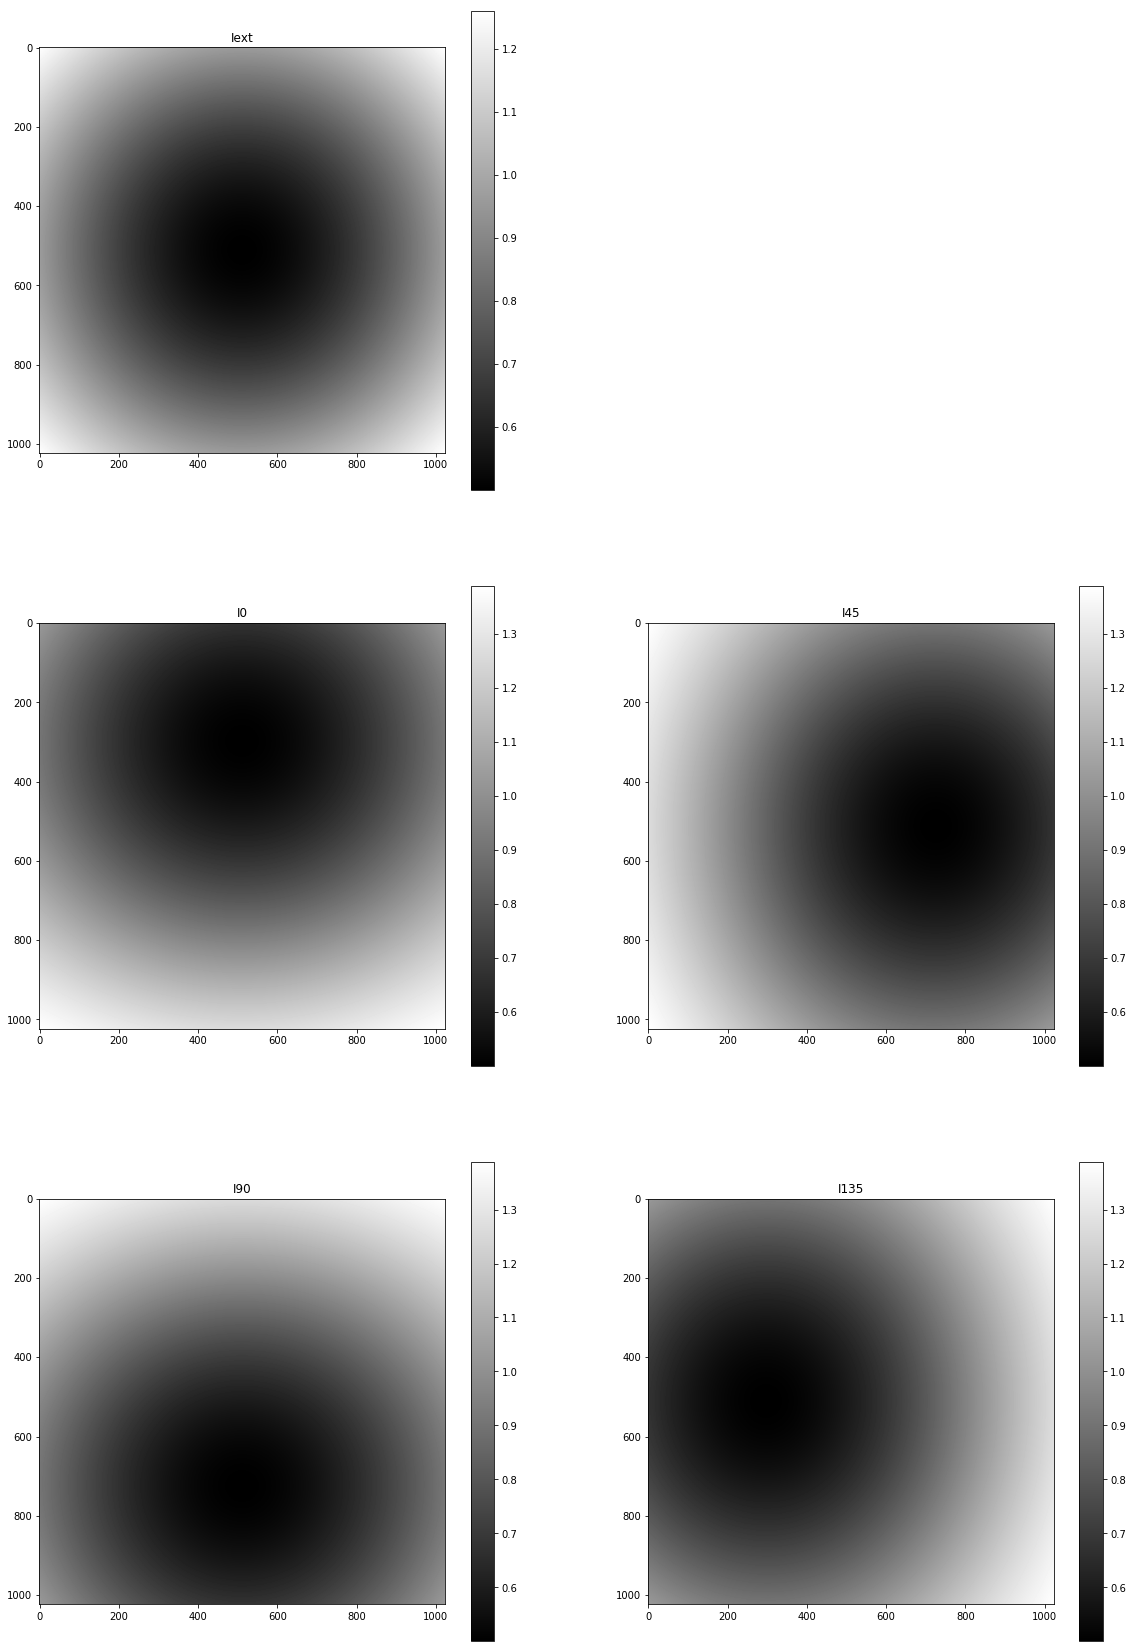

In [99]:
fig3 = plt.figure(figsize=(20,30)) # create a figure with the default size

ax1 = fig3.add_subplot(3,2,1) 
im=plt.imshow(Iext,cmap='gray');
plt.title('Iext')
ax1.figure.colorbar(im);

ax2=fig3.add_subplot(3,2,3)
im=plt.imshow(I0,cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('I0')
ax2.figure.colorbar(im);

ax3=fig3.add_subplot(3,2,4)
im=plt.imshow(I45,cmap='gray');
plt.title('I45')
ax3.figure.colorbar(im);

ax4=fig3.add_subplot(3,2,5)
im=plt.imshow(I90,cmap='gray');
plt.title('I90')
ax4.figure.colorbar(im);

ax5=fig3.add_subplot(3,2,6)
im=plt.imshow(I135,cmap='gray');
plt.title('I135')
ax4.figure.colorbar(im);